# <font color='red'> LESSON 4B: Classification model Fine-tuning </font>
  * <span style="color:blue">**Classification model - fine-tuning** </span>
    * basic model principles
    * model preparation (more techniques) 
    * dataset splitting
    * model interpretation (widely)
  * <span style="color:blue"> **Model assessment** </span>
    * to evaluate and choose the best model

## <font color='red'> Classification models </font>
GOAL: To predict the outcome of a given sample where the output variable is in the form of categories. 
Examples labels such as: male & female, sick & healthy, churner & non-churner, default & correct.

This means that we can use the following algorithms:

* Logistic Regression
* Decision Tree
* Random Forest
* Support Vector Classifications
* Stocastic Gradient Descend
* Nearest Neighbours Classifiers
* Gaussian Process Classification
* Other ensemble
* Neural Network Models
* Gradient Boosting (XGBoost)

We will start on those that we are more familiar with: Logistic regression. First, let's start with label. 

### Our dataset after datamart fine-tuning

In [1]:
import pandas as pd
data = pd.read_parquet('./data/full_data.parquet')
data

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,1,...,-0.488321,-0.830489,1.164283,0.428636,0.373509,-0.787243,0.350520,-0.359325,-0.270208,208500
2,0,1,0,0,0,0,1,0,0,1,...,0.532289,0.289638,-0.796041,-0.502349,-0.051541,1.768105,-0.811747,-0.359325,-0.270208,181500
3,0,0,0,1,0,0,1,0,0,1,...,-0.327437,-0.653917,1.191828,0.586571,0.663315,-0.787243,-0.011497,-0.359325,-0.270208,223500
4,0,0,0,0,1,0,1,0,0,1,...,-0.739702,-0.540801,0.939328,0.443182,0.827539,-0.787243,-0.144872,4.092524,-0.270208,140000
5,0,0,0,1,0,0,1,0,0,1,...,0.238172,-0.033157,1.621080,1.442744,1.764579,0.859156,0.788753,-0.359325,-0.270208,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,0,1,0,0,1,0,0,1,...,-0.244481,-0.562873,0.797009,0.297716,-0.051541,-0.787243,-0.049605,-0.359325,-0.270208,175000
1457,0,1,0,0,0,0,1,0,0,1,...,1.236157,2.527134,-0.796041,1.182983,0.141664,2.205430,-0.811747,-0.359325,-0.270208,210000
1458,0,0,0,0,1,0,1,0,0,1,...,0.255769,0.085477,1.848330,1.737833,-1.056203,-0.787243,0.331467,-0.359325,-0.270208,266500


In [2]:
data.shape

(1460, 236)

We have dataset with 1460 rows and 237 columns. 

## Label Binarization 
To obtain a binary variable that we can use as the response variable in a logistic regression, we have to create a new target variable **Label_b** for expensive saleprice (1) and other saleprices (0). 
For convenience we devide expensive and other prices based on the value of sales. The top 10% of highest prices are expensive, it stands for the threshold is quantil 0.90.

In [3]:
import numpy as np

In [4]:
data['label_b'] = data['label'] >= np.quantile(data['label'], 0.9)

In [5]:
data[data['label_b'] == False]

,MSSubClass_120,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_OTHER,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,label,label_b
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,1,...,-0.830489,1.164283,0.428636,0.373509,-0.787243,0.350520,-0.359325,-0.270208,208500,False
2,0,1,0,0,0,0,1,0,0,1,...,0.289638,-0.796041,-0.502349,-0.051541,1.768105,-0.811747,-0.359325,-0.270208,181500,False
3,0,0,0,1,0,0,1,0,0,1,...,-0.653917,1.191828,0.586571,0.663315,-0.787243,-0.011497,-0.359325,-0.270208,223500,False
4,0,0,0,0,1,0,1,0,0,1,...,-0.540801,0.939328,0.443182,0.827539,-0.787243,-0.144872,4.092524,-0.270208,140000,False
5,0,0,0,1,0,0,1,0,0,1,...,-0.033157,1.621080,1.442744,1.764579,0.859156,0.788753,-0.359325,-0.270208,250000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,0,1,0,0,1,0,0,1,...,-0.562873,0.797009,0.297716,-0.051541,-0.787243,-0.049605,-0.359325,-0.270208,175000,False
1457,0,1,0,0,0,0,1,0,0,1,...,2.527134,-0.796041,1.182983,0.141664,2.205430,-0.811747,-0.359325,-0.270208,210000,False
1458,0,0,0,0,1,0,1,0,0,1,...,0.085477,1.848330,1.737833,-1.056203,-0.787243,0.331467,-0.359325,-0.270208,266500,False


Let's check whether new label is really binary (class) variable. 

In [6]:
display(data['label_b'].nunique())
data.label_b.unique()

2

array([False,  True])

In [7]:
display(data['label_b'].value_counts())

False    1313
True      147
Name: label_b, dtype: int64

### Feature selection based on Chi-square
Compute chi-squared stats between each non-negative feature and class.

This score can be used to select the N features with the highest values for the test chi-squared statistic from feature list, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes. 

#### Selection of categorical features  


In [8]:
unique_count_ratio = 0.05
empty_ratio = 0.9
min_distinct_values = 2
excluded_features = ['label_b']
cat_features = []
columns = data.columns 
#consider feature categorical if ratio is below given value and number of unique records is >= 2
for var in columns:
    if \
      1.*data[var].nunique()/data[var].count() < unique_count_ratio \
      and data[var].nunique() >= min_distinct_values \
      and data[var].isna().sum() / data[var].count() < empty_ratio:
        cat_features.append(var)
cat_features = [f for f in cat_features if f not in excluded_features ]
#display(cat_features)

#### Chi-square computation

In [102]:
from sklearn.feature_selection import chi2
#cat_features_only = data.drop(['label', 'label_b'], axis=1)
chi = chi2(data[cat_features], data.label_b)
chi_table = pd.DataFrame()
chi_table['chi_sq_value'] = chi[0]
chi_table['p_value'] = chi[1]
chi_table['feature'] = cat_features

treshold = chi_table['chi_sq_value'].unique()
treshold.sort()
topn = 50

filtered_features = chi_table[chi_table['chi_sq_value'] > treshold[-(topn + 1)]]['feature'].tolist()
print(filtered_features)
pd.set_option('display.max_rows', 10)
display(chi_table.set_index('feature').sort_values('p_value', ascending=True))
pd.set_option('display.max_rows', 10)

['MSSubClass_60', 'MSSubClass_OTHER', 'Neighborhood_NridgHt', 'OverallQual_5', 'OverallQual_6', 'OverallQual_8', 'OverallQual_OTHER', 'RoofStyle_Hip', 'Exterior1st_VinylSd', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_OTHER', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'HeatingQC_TA', 'BsmtFullBath_1', 'FullBath_1', 'FullBath_OTHER', 'BedroomAbvGr_4', 'KitchenQual_Ex', 'KitchenQual_TA', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_9', 'TotRmsAbvGrd_OTHER', 'Fireplaces_0', 'Fireplaces_1', 'Fireplaces_2', 'FireplaceQu_Gd', 'FireplaceQu_None', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_Unf', 'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'SaleType_New', 'SaleCondition_Partial', 'YearBuilt_b_Newest', 'YearBuilt_b_Old', 'GarageYrBlt_b_Newest', 'YearRemodAdd_b_Newest', 'YearRemodAdd_b_Old', 'YearRemodAdd_b_Oldest']


,chi_sq_value,p_value
feature,,
GarageCars_3,491.774317,5.857906e-109
BsmtQual_Ex,432.246324,5.272040e-96
KitchenQual_Ex,309.422696,2.917339e-69
OverallQual_OTHER,275.776845,6.250565e-62
Neighborhood_NridgHt,232.330149,1.850065e-52
...,...,...
3SsnPorch_0,0.002619,9.591848e-01
Condition2_Norm,0.001833,9.658502e-01
PoolArea_0,0.000662,9.794673e-01


## Introduction into Discrete Regression
Regression with discrete dependent variables (e.g., binary outcomes) requires different techniques than the linear regression model that we have seen so far. 

This procedure, which is known as logistic regression, is an example of a binary classifier. 

E.g. the statsmodels library provides several methods for discrete regression:
* the **Logit** class,
* the related **Probit** class (which uses a cumulative distribution function of the normal distribution rather than the logistic  function to transform the linear predictor to the [0, 1] interval), 
* the multinomial logistic regression class **MNLogit** (for more than two categories), and 
* the Poisson regression class **Poisson** for Poisson-distributed count variables (positive integers).

Here we will create a logistic model for predicting the type of saleprice from our features. 

## <font color='orange'> Logistic Regression </font>

Binary model is a type of model which solves a classification problem!!!

logistic regression is a powerful and robust statistical technique for predicting the probability of an event occurring. 

Robust technique means that the model will perform well and hold up over time. 
Because the predictors are linear in the log of the odds, the trick is to get the predictors as linear as possible. 
There are several ways to accomplish this. 

Logistic regression sees all predictive variables as continuous. So for the noncontinuous variables, we have to use dummy variables to trick the model into thinking they are continuous.


### Splitting dataset into train and test

This ability to generalize is often measured with a validation set. scikit-learn provides a convenient function to split up our data, train_test_split. X_train and y_train now contain the training set, and X_test and y_test now contain the test or validation set, which by default contains 25% of the examples.

Let's split our dataset into train and test, it is important these two do not communicate during the training.
This means we will train on 70% of the data and test on the remaining 30.

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[filtered_features], data.label_b, test_size=0.30, random_state=42) 
print('\nFrequencies of target variable in training data set:\n',y_train.value_counts())
print('\nFrequencies of target variable in testing data set:\n',y_test.value_counts())


Frequencies of target variable in training data set:
 False    920
True     102
Name: label_b, dtype: int64

Frequencies of target variable in testing data set:
 False    393
True      45
Name: label_b, dtype: int64


### Logistic regression in Python

* scikit learn 
* statmodels 


#### Sklearn library

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred=log_model.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for Logistic regression model: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       395
        True       0.73      0.77      0.75        43

    accuracy                           0.95       438
   macro avg       0.85      0.87      0.86       438
weighted avg       0.95      0.95      0.95       438

[[383  12]
 [ 10  33]]

Accuracy Score for Logistic regression model:  0.9497716894977168


In [87]:
log_f1 = f1_score(y_pred, y_test)

#### Statsmodels library
We can now see how to solve the same example using the statsmodels library, specifically the logit package, that is for logistic regression. The package contains an optimised and efficient algorithm to find the correct regression parameters.


In [113]:
import statsmodels.api as sm

log_model2 = sm.Logit(y_train.astype(int), 
                      X_train[['GarageCars_3', 'BsmtQual_Ex', 'KitchenQual_Ex', 'OverallQual_OTHER', 
                               'Neighborhood_NridgHt', 'ExterQual_OTHER', 'OverallQual_8', 
                               'MasVnrType_Stone', 'SaleType_New', 'SaleCondition_Partial', 
                               'YearBuilt_b_Newest', 'GarageYrBlt_b_Newest', 'GarageFinish_Fin', 
                               'BsmtFinType1_GLQ', 'YearRemodAdd_b_Newest']])
result_log= log_model2.fit()
print(result_log.summary2())

         Current function value: 0.550882
         Iterations: 35
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      -0.697   
Dependent Variable:      label_b               AIC:                   1156.0036
Date:                    2022-05-10 10:44      BIC:                   1229.9464
No. Observations:        1022                  Log-Likelihood:        -563.00  
Df Model:                14                    LL-Null:               -331.80  
Df Residuals:            1007                  LLR p-value:           1.0000   
Converged:               0.0000                Scale:                 1.0000   
No. Iterations:          35.0000                                               
-------------------------------------------------------------------------------
                       Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-------------------------------------------------------------------------------
GarageC

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Explanation of some of the terms in the summary table

**coef**: the coefficients of the independent variables in the regression equation.
    
**Log-Likelihood**: the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimisation process of finding the set of parameters which result in best fit.
    
**LL-Null**: the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
    
**Pseudo R-squ.**: a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.
    

## <font color='orange'>Decision Tree </font>

The goal of a classification tree is to sequentially partition the data to maximize the differences in the dependent
variable. It is often referred to as a decision tree. 

The true purpose of a classification tree is to classify the data into distinct groups or branches that create the strongest separation in the values of the dependent variable.

Classification trees are very good at identifying segments with a desired behavior such as response or activation. This
identification can be quite useful when a company is trying to understand what is driving market behavior. 
It also has an advantage over regression in its ability to detect nonlinear relationships. This can be very useful in identifying
interactions for inputs into other modeling techniques.

Classification trees are "grown" through a series of steps and rules that offer great flexibility. 

A definite advantage of classification trees over other techniques is their ability to explain the results. I often develop
complex logistic models for scoring and build a tree to explain the results to the marketers. Although the outcome is
never identical, the tree does a good job of uncovering key drivers in the market. Due to their broad applicability,
classification trees are a valuable tool for all types of target modeling.

In [114]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score, make_scorer

#create the model
tree_model = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the model
tree_model.fit(X_train, y_train)

y_pred=tree_model.predict(X_test)

### Decision Tree Set-Up
It is a good chance to discuss some of parameters:
* criterion can be **gini** (measures how often a randomly chosen element would be incorrectly identified) or **entropy** (measures the information contained by each attribute, thus we estimate the reduction in entropy due to sorting on the attribute)

* **max depth** is the maximum amount of steps the tree should do

* **max leaf nodes** maximum number of nodes

* **min sample split** a limit to stop further splitting, useful to avoid overfitting


In [115]:
tree_model2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')
tree_model2.fit(X_train, y_train)

y_pred=tree_model2.predict(X_test)

In [116]:
# Accuracy Score
from sklearn.metrics import accuracy_score
tree_model2.score(X_test, y_test)
accuracy_score(y_test, y_pred)

0.9452054794520548

In [93]:
score = accuracy_score(y_test, y_pred)
print("Decision Tree Prediction Score : ", score )

Decision Tree Prediction Score :  0.9429223744292238


### Using GridSearch Cross Validation for Tuning Parameters to Improve Classification Performance


In [94]:
from sklearn.model_selection import GridSearchCV
# define the parameters grid
params = {'max_depth': [5,10,15], 
         'criterion' : ['gini','entropy'],
         'max_leaf_nodes': list(range(2, 100)), 
         'min_samples_split': [2, 3, 4, 5]}

# create the grid - based on roc_auc - we can change it and use 'roc_auc'
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         params, verbose=1, cv=3,scoring='accuracy')
#training
grid_tree.fit(X_train, y_train)
# summarize the results of the grid search
print(grid_tree)
# best estimator
print(grid_tree.best_estimator_)
# best score
print(grid_tree.best_score_)

Fitting 3 folds for each of 2352 candidates, totalling 7056 fits
GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy', verbose=1)
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4, random_state=42)
0.9422718647576334


In [95]:
# best score
print("Best Score :  ",grid_tree.best_score_)
# best estimator
print("Best Parameters : ",grid_tree.best_estimator_)

Best Score :   0.9422718647576334
Best Parameters :  DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4, random_state=42)


In [120]:
tree_classifier = DecisionTreeClassifier(class_weight=None, 
                                    criterion='entropy', 
                                    max_depth=5, 
                                    max_leaf_nodes=4, 
                                    random_state=42, 
                                    splitter='best')
tree_classifier.fit(X_train, y_train)
predictions = tree_classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.9360730593607306

In [121]:
tree_f1 = f1_score(y_pred, y_test)

### Feature importance
Next, we can see how important are our features for this model.

In [122]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(tree_classifier, filtered_features)
#get_feature_importance(classifier, features)

,feat,score
42,GarageCars_3,0.666645
5,OverallQual_8,0.197293
16,BsmtQual_Ex,0.136061
0,MSSubClass_60,0.000000
38,GarageFinish_Fin,0.000000
...,...,...
21,HeatingQC_TA,0.000000
22,BsmtFullBath_1,0.000000
23,FullBath_1,0.000000
24,FullBath_OTHER,0.000000


In [123]:
tree_classifier2 = DecisionTreeClassifier(class_weight=None, 
                                    criterion='entropy', 
                                    max_depth=5, 
                                    max_leaf_nodes=4
                                    )
tree_classifier2.fit((X_train[['GarageCars_3', 'BsmtQual_Ex', 'OverallQual_8']]), y_train)
predictions = tree_classifier2.predict(X_test[['GarageCars_3', 'BsmtQual_Ex', 'OverallQual_8']])
accuracy_score(y_true = y_test, y_pred = predictions)

0.9360730593607306

### Tree visualisation
The good thing about trees is that it is easy to visualize

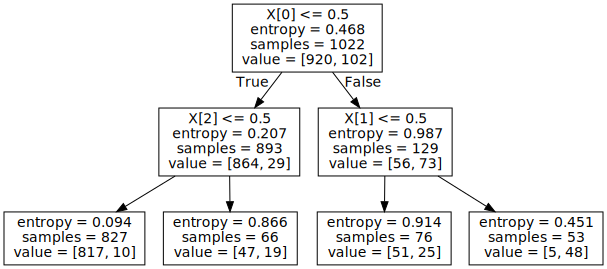

In [124]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_classifier2, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

## <font color='orange'> Random Forest </font>
Random Forest is a bagging ensambles technique. 

It trains on a large number of trees and combine them. 

The randomness comes from the fact that each tree is allowed to choose from a random subset of features to split on and each tree is trained on a random subset of observations. It means that each tree is constructed using a random sample of records and each split is constructed using a random sample of predictors.

The number of features to be searched at each split point is specified as a parameter to the random forest algorithm.


In [125]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score, make_scorer

for x in range(2,10):
    for y in [100,50,10]:
        forest=RandomForestClassifier(max_depth=x,n_estimators=y)
        forest.fit(X_train,y_train)
        y_pred=forest.predict(X_test)
        print("depth= ",x,' estimators= ',y,' accuracy= ',accuracy_score(y_test,y_pred))

depth=  2  estimators=  100  accuracy=  0.9337899543378996
depth=  2  estimators=  50  accuracy=  0.9315068493150684
depth=  2  estimators=  10  accuracy=  0.9315068493150684
depth=  3  estimators=  100  accuracy=  0.9429223744292238
depth=  3  estimators=  50  accuracy=  0.9406392694063926
depth=  3  estimators=  10  accuracy=  0.9406392694063926
depth=  4  estimators=  100  accuracy=  0.9429223744292238
depth=  4  estimators=  50  accuracy=  0.9452054794520548
depth=  4  estimators=  10  accuracy=  0.9406392694063926
depth=  5  estimators=  100  accuracy=  0.9497716894977168
depth=  5  estimators=  50  accuracy=  0.9429223744292238
depth=  5  estimators=  10  accuracy=  0.9406392694063926
depth=  6  estimators=  100  accuracy=  0.954337899543379
depth=  6  estimators=  50  accuracy=  0.9474885844748858
depth=  6  estimators=  10  accuracy=  0.9383561643835616
depth=  7  estimators=  100  accuracy=  0.95662100456621
depth=  7  estimators=  50  accuracy=  0.958904109589041
depth=  7  e

In [126]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score, make_scorer

forest_model=RandomForestClassifier(max_depth=8)
forest_model.fit(X_train,y_train)

y_pred=forest_model.predict(X_test)

In [127]:
forest_f1 = f1_score(y_pred, y_test)

In [128]:
# Top 12 features
features_top_12 = pd.DataFrame(zip(forest_model.feature_importances_, list(X_train.columns))  
                              ).sort_values(by=0, ascending=False)[:12]
features_top_12.reset_index()

,index,0,1
0,16,0.126888,BsmtQual_Ex
1,42,0.121366,GarageCars_3
2,5,0.078073,OverallQual_8
3,26,0.061034,KitchenQual_Ex
4,6,0.053595,OverallQual_OTHER
...,...,...,...
7,22,0.028109,BsmtFullBath_1
8,13,0.026981,ExterQual_TA
9,18,0.022929,BsmtExposure_Gd
10,25,0.022774,BedroomAbvGr_4


## <font color='orange'> Ada Boost Classifier </font>
Boosting is a sequential ensemble where each model is built based on correcting the misclassifications of the previous model.
Boosting involves ‘weighted voting’, where each classifier votes to obtain a final outcome which is determined by the majority– but the sequential models were built by assigning greater weights to misclassified instances of the previous models.

In [129]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score, make_scorer
#from xgboost import XGBClassifier

ada_model = AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best'),
          learning_rate=0.75, n_estimators=300, random_state=None)
ada_model.fit(X_train,y_train)
y_pred=ada_model.predict(X_test)

In [130]:
ada_f1 = f1_score(y_pred, y_test)

In [131]:
# Top 12 features
features_top_12 = pd.DataFrame(zip(ada_model.feature_importances_, list(X_train.columns))  
                              ).sort_values(by=0, ascending=False)[:12]
features_top_12.reset_index()

,index,0,1
0,42,0.451318,GarageCars_3
1,5,0.182655,OverallQual_8
2,33,0.039385,Fireplaces_2
3,16,0.036752,BsmtQual_Ex
4,23,0.024161,FullBath_1
...,...,...,...
7,27,0.020629,KitchenQual_TA
8,35,0.018507,FireplaceQu_None
9,8,0.016963,Exterior1st_VinylSd
10,4,0.014000,OverallQual_6


## <font color='orange'>Support Vector Machine</font>
VMs are one of the most robust prediction methods, being based on statistical learning framework. 
It is technique for supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. 

In [132]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score, make_scorer

svm_model = SVC(C=10.0)

svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)

In [133]:
svm_f1 = f1_score(y_pred, y_test)

## <font color='orange'>Neural Network</font>
Neural networks are made up of nodes that are arranged in layers. 

This construction varies depending on the type and complexity of the neural network. 


At the beginning, the weights or ''inputs" are assigned to each of the nodes in the first layer. During each iteration, the inputs are processed through the system and compared to the actual value. The error is measured and fed back through the system to adjust the weights. 

In [134]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score, make_scorer

nn_model = MLPClassifier(hidden_layer_sizes=(64, 64))

nn_model.fit(X_train, y_train)
y_pred=nn_model.predict(X_test)

In [135]:
nn_f1 = f1_score(y_pred, y_test)

## <font color='orange'>K nearest neighbors model (KNN classifier) </font>

### Model fitting and predicting 
We can make predictions on any data set, using the original training set X. 

The variable y_pred now contains one entry per row of X with the prediction from the trained classifier

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score, make_scorer

# Create the model
knn_model =  KNeighborsClassifier(n_neighbors=1)
# Fitting the model
knn_model.fit(X_train, y_train)
# Training the model - values predicting 
y_pred=knn_model.predict(X_test)

### Model evaluation
Let's evaluate our KNN classifier. 

Before we compute the score on the test set, we need to make sure our model is training on the training set only, otherwise it would have access to the test set, defeating its purpose. So we refit on the training set, and compute the test score. We see that we have a much lower testing accuracy. 


In [137]:
knn_model.score(X_test, y_test)

0.952054794520548

In [138]:
f1_score(y_pred, y_test)

0.7529411764705882

In [139]:
knn_f1 = f1_score(y_pred, y_test)

## <font color='red'>Model Comparison - Results </font>

We have a set of model validation metrics
* Confusion Matrix
* Accuracy Score --> Accuracy 
* Classification Report --> Precision, recall, f1-score and support
* F1 score

## Confusion Matrix
We often work with ROC curve and Area under Curve. In genral, we want to determine whether our ROC curve is good or not by looking at AUC (Area Under the Curve) and other parameters which are also called as Confusion Metrics. 

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. All the measures except AUC can be calculated by using left most four parameters. So, let’s talk about those four parameters first.

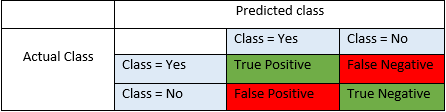!

True positive and true negatives are the observations that are correctly predicted and therefore shown in green. We want to minimize false positives and false negatives so they are shown in red color. These terms are a bit confusing. So let’s take each term one by one and understand it fully.

**True Positives (TP)** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

**True Negatives (TN)** - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

**False Positives (FP)** – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

**False Negatives (FN)** – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

In [140]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[385   8]
 [ 13  32]]


In [141]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
 
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

TP: 32, FP: 8, TN: 385, FN: 13


## Accuracy (ACC)
Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. 
One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. 
Therefore, you have to look at other parameters to evaluate the performance of your model. 
Example: If We have got accuracy = 0.803 so it meansthat our model is approx. 80% accurate.

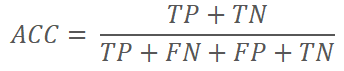

In [142]:
# Accuracy Score
from sklearn.metrics import accuracy_score
knn_model.score(X_test, y_test)
accuracy_score(y_test, y_pred)

0.952054794520548

## Precision & Recall
**Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Example: The question that this metric answer is of all passengers that labeled as survived, how many actually survived? 

High precision relates to the low false positive rate. 

Precision = TP/TP+FP

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

Example: The question recall answers is: Of all the passengers that truly survived, how many did we label? 

Recall = TP/TP+FN



In [143]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       393
        True       0.80      0.71      0.75        45

    accuracy                           0.95       438
   macro avg       0.88      0.85      0.86       438
weighted avg       0.95      0.95      0.95       438



In [144]:
log_acc = log_model.score(X_test, y_test)
tree_acc = tree_classifier.score(X_test, y_test)
forest_acc = forest_model.score(X_test, y_test)
ada_acc = ada_model.score(X_test, y_test)
svm_acc = svm_model.score(X_test, y_test)
nn_acc = nn_model.score(X_test, y_test)
knn_acc = knn_model.score(X_test, y_test)

print("Accuracy Results\n" + "*"*40)
print("      Logistic Model:", log_acc)
print("       Decision Tree:", tree_acc)
print("        Forest Model:", forest_acc)
print("           Ada Boost:", ada_acc)
print("           SVM Model:", svm_acc)
print("Neural Network Model:", nn_acc)
print("     Neighbors Model:", knn_acc)

Accuracy Results
****************************************
      Logistic Model: 0.9497716894977168
       Decision Tree: 0.9360730593607306
        Forest Model: 0.958904109589041
           Ada Boost: 0.9429223744292238
           SVM Model: 0.958904109589041
Neural Network Model: 0.958904109589041
     Neighbors Model: 0.952054794520548


## F1 score
F1 Score is the weighted average of Precision and Recall. 

Therefore, this score takes both false positives and false negatives into account. 
Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. 
Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall

So we define the Precision as TP/(TP+FP) and Recall as TP/(TP+FN). 

And we have

F1 = 2 (Prec Rec) / (Prec + Rec)

In [145]:
from sklearn.metrics import f1_score

knn_model.score(X_test, y_test)
f1_score(y_test, y_pred)

0.7529411764705882

In [146]:
# f1_score
print("F1 score Results\n" + "*"*40)
print("      Logistic Model:", log_f1)
print("       Decision Tree:", tree_f1)
print("        Forest Model:", forest_f1)
print("           Ada Boost:", ada_f1)
print("           SVM Model:", svm_f1)
print("Neural Network Model:", nn_f1)
print("     Neighbors Model:", knn_f1)


F1 score Results
****************************************
      Logistic Model: 0.7710843373493975
       Decision Tree: 0.7272727272727273
        Forest Model: 0.775
           Ada Boost: 0.7191011235955056
           SVM Model: 0.7954545454545455
Neural Network Model: 0.8043478260869565
     Neighbors Model: 0.7529411764705882


### Exercises

1. Compare F1 score for predicting LotArea variable (large = 1, other = 0; as large are considered top 40 %) using Random Forest a Ada Boost model.

In [ ]:
# 1.
# Your solution